In [120]:
using CSV, Tables, LinearAlgebra, Random, Gurobi, JuMP, DataFrames, Statistics, MLJ, Plots, Clustering, Distances

In [144]:
include("../src/utils.jl");
include("../src/opt.jl");

In [150]:
K, N, D, std, seed = 2, 20, 2, 0.01, 42

(2, 20, 2, 0.01, 42)

In [151]:
data = generate_points(K, N, D, std, seed);

In [152]:
data

20×2 Matrix{Float64}:
 0.994069    0.00269656
 0.00342418  0.994656
 1.0         0.000748335
 0.994371    0.00176022
 0.997764    0.00515843
 0.995033    0.0
 0.011419    0.995781
 0.00504354  1.0
 0.995813    0.00087348
 0.992758    0.0013766
 0.99822     0.00399658
 0.0         0.996701
 0.00320396  0.998911
 0.00479737  0.999423
 0.00687893  0.996694
 0.00459851  0.997014
 0.993486    0.00364509
 0.00738192  0.994076
 0.00495229  0.997674
 0.00748057  0.999672

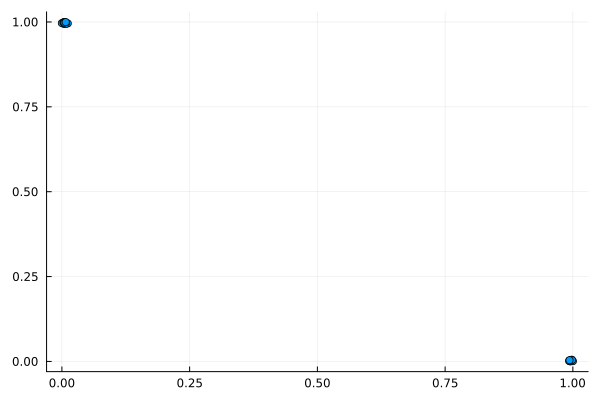

In [153]:
plot(data[:,1], data[:,2], seriestype=:scatter, legend=false)

In [139]:
assignments = gamma_formulation(data, K)
centroids = get_centroids(assignments, data)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18


2×2 Matrix{Float64}:
 0.482308  0.522243
 0.029831  0.989615

In [146]:
a, θ, f, b, γ = gamma_formulation(data, K);

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18


In [148]:
θ

20×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [149]:
b

19×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [127]:
assignments

20×2 Matrix{Float64}:
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 0.0  1.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0

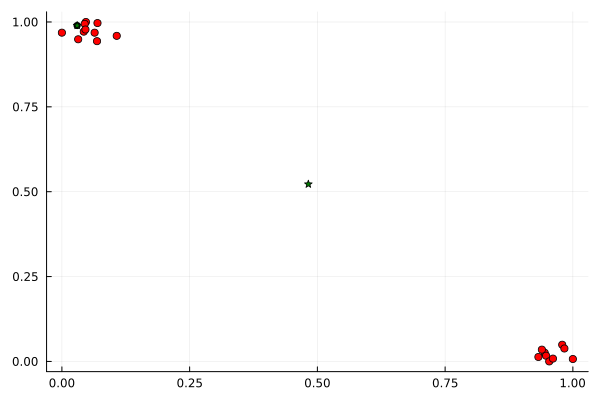

In [143]:
mapping = Dict(1=>:red, 2=>:black, 3=>:blue)
colors = [mapping[v] for v in argmax.(eachrow(assignments))];

plot(data[:,1], data[:,2], seriestype=:scatter, legend=false, color=colors)
plot!(centroids[:,1], centroids[:,2], seriestype=:scatter, legend=false, color=:green, markershape=:star5)